# Education Analysis in Portugal
# Students enrolled in a Portuguese and Math Class.

## Skills Shown:
> <font color='red'> Machine Learning-Regression & Classification </font> <br>
> <font color='blue'>  Data Visualization </font> <br>
> <font color='green'> Dimensionality Reduction </font> <br>

# Introduction:
I have long held an interest in education. In fact, I will be working in the education realm
this summer. One of the most important aspects of education is improving assessment scores
and final grades. It is a particularly tricky task, as students differ along so many characteristics.
The particular datasets that I decided to analyze tried to approach
achievement for Portuguese students at a secondary education level. There were two datasets I
looked at. The first corresponded to students in a Portuguese class and the other corresponded to
those in a math class. A lot of my questions revolved around the G3 (Final Grade) variable
present in both, as it is usually considered the most important variable in education assessment. I
was also curious if I could cluster students because perhaps it was possible that these clusters
learn differently in the classroom. Finally, I aimed to see if I could predict the “famsup” (Family
Education Support) variable using a classification algorithm. If an individual does not have
family support for his/her education, it is likely they are not putting an optimal amount of effort
into school.

Questions I asked:<br>
1.How does the distribution of finals grades for the math class compare to the final grades of the
Portuguese class?<br>
 2.What variables are highly positively/negatively correlated for final grades in the math class and Portuguese class?<br>
 3.Can I use a Linear Regression model to predict G3 scores for both classes? <br>
 4.Do students who drink heavily class on the weekend get worse final grades than
 those who do not drink at all on the weekend? <br>
5.Can students in the math class be clustered into groups? <br>
 6.Can I create a classification model to predict family support for students in the Portuguese
class?<br>

## Data Sources: <br>
The two datasets I used were acquired from the UCI Machine Learning repository
(https://archive.ics.uci.edu/ml/datasets/student+performance). <br>
There were 33 different variablesin both datasets with 650 subjects in both. The most important variables in both datasets were:<br>
G1 - first period grade (numeric: from 0 to 20)<br>
G2 - second period grade (numeric: from 0 to 20)<br>
G3 - final grade (numeric: from 0 to 20, output target)<br>
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br> 
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
famsup - family educational support (binary: yes or no)<br>
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th
grade, 3 - secondary education or 4 - higher education) 

### Importing the necessary libraries

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.decomposition as skd
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sph
import scipy.spatial.distance as spd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import sklearn.cluster as skc
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
from sklearn.metrics import confusion_matrix
import sklearn.naive_bayes as sknb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from IPython.core.display import HTML

In [3]:
#Reading in the datasets
math_class=pd.read_csv("student-mat.csv")
port_class=pd.read_csv("student-por.csv")

# Question 1: How does the distribution of finals grades for the math class compare to the final grades of the Portuguese class?

### Conclusion: As you will see from my code, on average, students do better in the Portuguese class. This is further indicated by the histogram which shows the histogram of G3 values to be left-skewed. Both distributions are not normally distributed according to QQ plots. 
I found that ,on average, students get around a 10.4 in the math class and a 11.9 in the
Portuguese class (out of 20). Similarly, median and mode are both higher for final Portuguese
class grades.
The distributions are similar in that they are both not normal. However, G3 scores for the
Portuguese Class are definitely more left skewed (That graph is below).
Implications:
Students do better, on average, in the Portuguese class. I would not consider either group to have
normally distributed data.</font>

In [4]:
#Taking a peak at the data
port_class.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# Mean, Median, and Mode of Math Class Final Grade
print("The mean final grade in the math class was {}".format(np.mean(math_class["G3"])))
print("The median final grade in the math class was {}".format(np.median(math_class["G3"])))
print("The mode final grade in the math class was {}".format(stats.mode(math_class["G3"])))

The mean final grade in the math class was 10.415189873417722
The median final grade in the math class was 11.0
The mode final grade in the math class was ModeResult(mode=array([10]), count=array([56]))


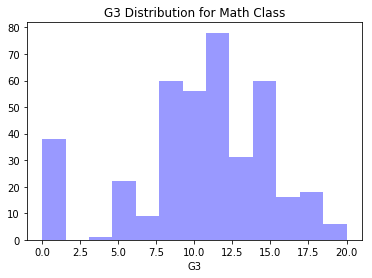

In [6]:
# Histogram
sns.distplot(math_class["G3"],kde=False,color="blue").set_title("G3 Distribution for Math Class")

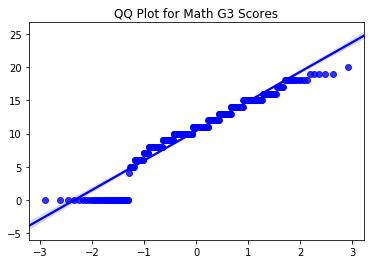

In [7]:
## QQ Plot For Math Scores
x,y=stats.probplot(math_class["G3"],fit=False)
sns.regplot(x,y,color="blue").set_title("QQ Plot for Math G3 Scores")

In [8]:
# Mean, median and Mode of Final Grade in Portuguese Class
print("The mean final grade in the Portuguese class was {}".format(np.mean(port_class["G3"])))
print("The median final grade in the Portuguese class was {}".format(np.median(port_class["G3"])))
print("The mode final grade in the Portuguese class was {}".format(stats.mode(port_class["G3"])))

The mean final grade in the Portuguese class was 11.906009244992296
The median final grade in the Portuguese class was 12.0
The mode final grade in the Portuguese class was ModeResult(mode=array([11]), count=array([104]))


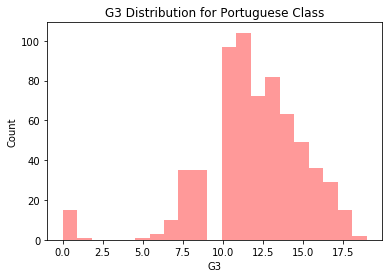

In [9]:
# Histogram of Final Grades for Portuguese Class
ax=sns.distplot(port_class["G3"],color="red",kde=False)
ax.set_title("G3 Distribution for Portuguese Class")
ax.set_ylabel("Count")
ax.set_xlabel("G3")

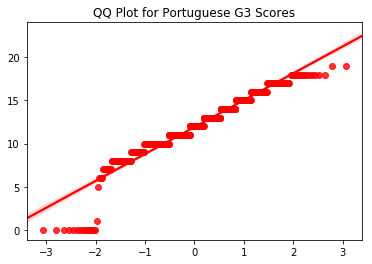

In [10]:
x,y=stats.probplot(port_class["G3"],fit=False)
sns.regplot(x,y,color="red").set_title("QQ Plot for Portuguese G3 Scores")

# Question 2: What variables are highly positively/negatively correlated for final grades in the math class and Portuguese class?

### Conclusion: In the following section I ran correlation matrixes for both datasets. After sorting values in descending order, I found that for the most part, both G3 variables have a very similar order of variables that are highly/negatively correlated. G2, G1, and Medu are both extremely positively correlated for both, while failures are highly negatively correlated for both.

In [11]:
# Seeing what variables correlate most positively/negatively with G3 for math class
#Used Spearman because not all data is normally distributed
math_class.corr(method="spearman").sort_values(by="G3",ascending=False)["G3"]

G3            1.000000
G2            0.957125
G1            0.878001
Medu          0.225036
Fedu          0.170049
studytime     0.105170
famrel        0.054977
absences      0.017731
freetime     -0.004994
health       -0.047790
Walc         -0.104459
traveltime   -0.120530
Dalc         -0.120944
goout        -0.166119
age          -0.173438
failures     -0.361224
Name: G3, dtype: float64

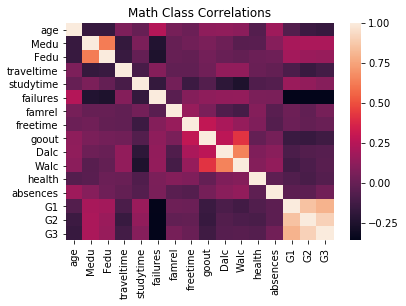

In [12]:
#Creating a heatmap
ax = plt.axes()

sns.heatmap(math_class.corr(), ax=ax)
ax.set_title('Math Class Correlations')
plt.show()

In [13]:
# Seeing what variables correlate most positively/negatively with G3 for Portuguese class
#Use Spearman because not all data is normally distributed
port_class.corr(method="spearman").sort_values(by="G3",ascending=False)["G3"]

G3            1.000000
G2            0.944451
G1            0.883288
Medu          0.283925
studytime     0.274712
Fedu          0.234633
famrel        0.047755
age          -0.066277
goout        -0.104967
health       -0.105672
freetime     -0.128375
traveltime   -0.146948
absences     -0.158510
Walc         -0.170895
Dalc         -0.208394
failures     -0.448360
Name: G3, dtype: float64

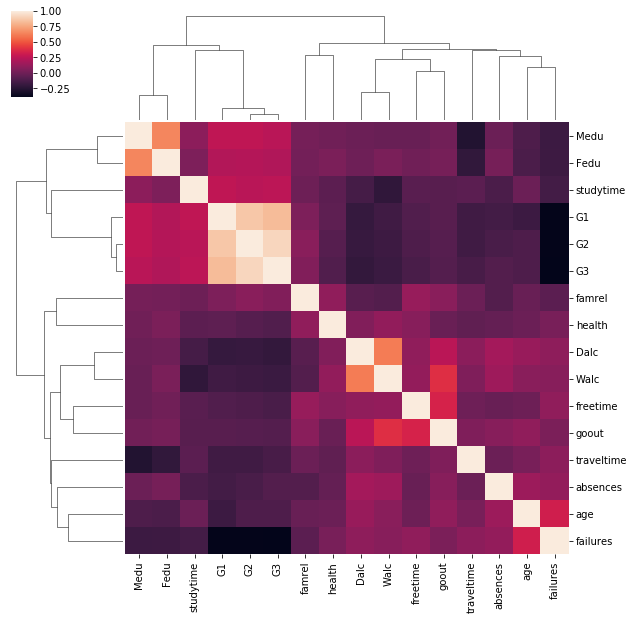

In [14]:
#Creating a heatmap for the Portuguese Class
current_palette_4 = sns.color_palette("hls", 4)
sns.set_palette(current_palette_4)
sns.clustermap(port_class.corr())

# Question 3: Can I use a Linear Regression model to predict G3 scores for both classes?


### Conclusion: I would say the answer to this question is yes, but with a caveat. I ran an OLS regression method for both classes. I included variables that had an absolute correlation of at least .2 with the G3 score from their repective dataset. I found an extremely high R^2 value for both models (north of .8 for both). However, I question these results because the residuals are not normally distributed and violate the randomness assumption. 
### I found that without G1 and G2 included in the models, OLS returns a low R^2 value.
### OLS for Math class-Independent Variables are Failures, Medu, G2 and G1. R^2 value of .824.

In [15]:
#Creating an OLS Regression for Math Class, only used variables with a correlation greater than .2
model1 = smf.ols('G3 ~ failures+ Medu + G2+G1', data=math_class).fit()
model1.summary()
#.824 R^2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     455.2
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          1.88e-145
Time:                        21:11:38   Log-Likelihood:                -818.51
No. Observations:                 395   AIC:                             1647.
Df Residuals:                     390   BIC:                             1667.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6940      0.433     -3.913      0.000      -2.545      -0.843
failures      -0.2164      0.143     -1.512      0.131      -0.498       0.065
Medu           0.0626      0.093      0.676      0.499      -0.119       0.245
G2             0.9758      0.050     19.560      0.000       0.878       1.074
G1             0.1425      0.056      2.526      0.012       0.032       0.253
==============================================================================
Omnibus:                      242.109   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1756.743
Skew:                          -2.627   Prob(JB):                         0.00
Kurtosis:                      11.895   Cond. No.                         73.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residuals For Math Class: Plotted histogram, qq plot, lag plot and Run Sequence plot.

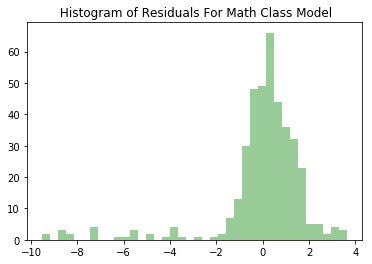

In [16]:
#Calculating Math Class Residuals
expected = (-.2164*math_class.failures+-1.694+.0626*math_class.Medu+math_class.G1*.1425+math_class.G2*.9758)
residuals = math_class.G3 - expected
#Histogram
sns.distplot(residuals,color="green",kde=False).set_title(" Histogram of Residuals For Math Class Model")

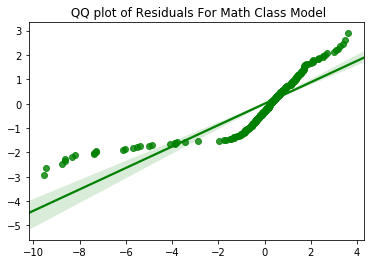

In [17]:
#qq plot for math class residuals, Not Normal
qntls, xr = stats.probplot(residuals, fit=False)
sns.regplot(xr,qntls,color="green").set_title(" QQ plot of Residuals For Math Class Model")

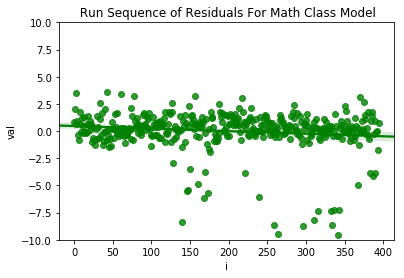

In [18]:
# Run sequence For Math class residuals
ax = sns.regplot(np.arange(len(residuals)),residuals,color="green")
ax.set_title(" Run Sequence of Residuals For Math Class Model")
ax.set_ylim(-10,10)
ax.set_ylabel("val")
ax.set_xlabel("i")

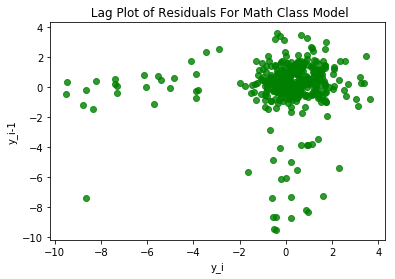

In [19]:
# Lag Plot For Math Class Residuals, Randomness Assumption Violated
lag = residuals.copy()
lag = np.array(lag[:-1])
current = residuals[1:]
ax = sns.regplot(current,lag,fit_reg=False,color="green")
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")
ax.set_title(" Lag Plot of Residuals For Math Class Model")

### OLS for Portuguese Class-Independent Variables -Failures, Medu, G2, G1, Studytime, Fedu and Dalc.

In [20]:
 model1 = smf.ols('G3 ~ failures+ Medu + G2+G1+studytime+Fedu+Dalc', data=port_class).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     519.7
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          2.10e-259
Time:                        21:11:39   Log-Likelihood:                -1065.4
No. Observations:                 649   AIC:                             2147.
Df Residuals:                     641   BIC:                             2183.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2071      0.289      0.718      0.473      -0.360       0.774
failures      -0.2022      0.091     -2.216      0.027      -0.381      -0.023
Medu          -0.0433      0.058     -0.747      0.455      -0.157       0.071
G2             0.8858      0.034     25.943      0.000       0.819       0.953
G1             0.1327      0.036      3.649      0.000       0.061       0.204
studytime      0.0792      0.062      1.276      0.202      -0.043       0.201
Fedu           0.0296      0.059      0.501      0.617      -0.087       0.146
Dalc          -0.0863      0.055     -1.575      0.116      -0.194       0.021
==============================================================================
Omnibus:                      464.009   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10643.959
Skew:                          -2.879   Prob(JB):                         0.00
Kurtosis:                      21.986   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residuals for Portuguese Class : Plotted histogram, qq plot, lag plot and Run Sequence plot.

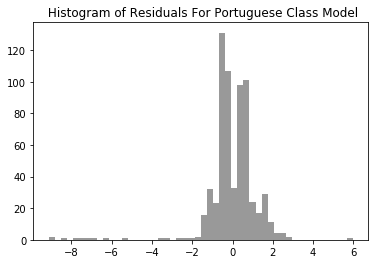

In [21]:
#Calculating Portuguese Class Residuals
expected = (-.2022*port_class.failures+.2071+-.04033*port_class.Medu+port_class.G1*.1327+port_class.G2*.8858+port_class.studytime*.0792+port_class.Fedu*.0296+port_class.Dalc*-.0863)
residuals = port_class.G3 - expected
sns.distplot(residuals,color="black",kde=False).set_title(" Histogram of Residuals For Portuguese Class Model")

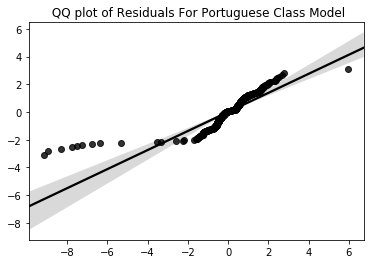

In [22]:
#QQ plot for Portuguese Class Residuals, Not Normal
qntls, xr = stats.probplot(residuals, fit=False)
sns.regplot(xr,qntls,color="black").set_title(" QQ plot of Residuals For Portuguese Class Model")

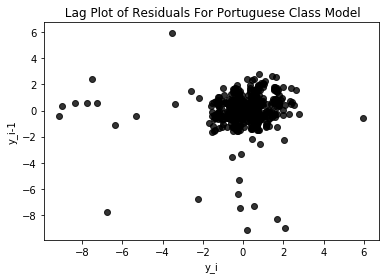

In [23]:
# Lag Plot For Portuguese Class Residuals, Randomness Assumption does not hold
lag = residuals.copy()
lag = np.array(lag[:-1])
current = residuals[1:]
ax = sns.regplot(current,lag,fit_reg=False,color="black")
ax.set_title(" Lag Plot of Residuals For Portuguese Class Model")
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

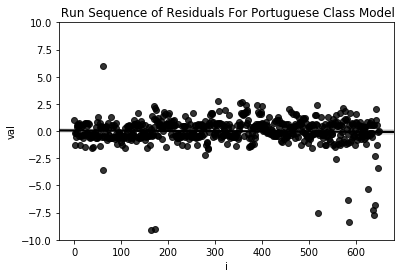

In [24]:
# Run sequence For Portuguese Class Residuals
ax = sns.regplot(np.arange(len(residuals)),residuals,color="black")
ax.set_ylim(-10,10)
ax.set_title(" Run Sequence of Residuals For Portuguese Class Model")
ax.set_ylabel("val")
ax.set_xlabel("i")

### OLS without G1 or G2-Kept other Variables

In [25]:
#Fitting an OLS Regression without G2 or G1
model1 = smf.ols('G3 ~ failures+ Medu', data=math_class).fit()
model1.summary()
#R^2 of .148

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     34.13
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           2.16e-14
Time:                        21:11:41   Log-Likelihood:                -1129.5
No. Observations:                 395   AIC:                             2265.
Df Residuals:                     392   BIC:                             2277.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4821      0.621     15.267      0.000       8.261      10.703
failures      -2.0168      0.296     -6.824      0.000      -2.598      -1.436
Medu           0.5845      0.201      2.911      0.004       0.190       0.979
==============================================================================
Omnibus:                       35.775   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.955
Skew:                          -0.760   Prob(JB):                     4.70e-10
Kurtosis:                       3.545   Cond. No.                         9.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Fitting an OLS model without G2 and G1 for Portuguese Class
model1 = smf.ols('G3 ~ failures+ Medu+studytime+Fedu+Dalc', data=port_class).fit()
model1.summary()
#R^2 of .24

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     41.08
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           1.04e-36
Time:                        21:11:41   Log-Likelihood:                -1591.5
No. Observations:                 649   AIC:                             3195.
Df Residuals:                     643   BIC:                             3222.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4544      0.443     23.606      0.000       9.585      11.324
failures      -1.7445      0.193     -9.046      0.000      -2.123      -1.366
Medu           0.3456      0.129      2.676      0.008       0.092       0.599
studytime      0.6502      0.137      4.758      0.000       0.382       0.919
Fedu           0.2105      0.133      1.586      0.113      -0.050       0.471
Dalc          -0.5134      0.122     -4.223      0.000      -0.752      -0.275
==============================================================================
Omnibus:                      129.526   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.710
Skew:                          -0.956   Prob(JB):                     5.30e-86
Kurtosis:                       6.296   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 4-Do Heavy Weekend Drinkers get worse Final Grades (G3), than those who do not drink at all on the weekends?

### Conclusion: For this section, I found that heavy weekend drinkers, on average,(either 4 or 5 for the Walc variable) did worse than those who did not drink on the weekend. I found a statistically significant p-value from a Mann Whitney U test.
### I first created two dataframes. One for heavy drinkers and one for non-drinkers. I then used a Mann Whitney U test to determine if the difference in medians was significant ( I could not use a t-test because data was not exactly normally distributed). The p-value was below .05 so I determined it to be a significant difference. I then calculated the means for both groups and saw that the people who did not drink did better on average.

In [27]:
#Not enough heavy weekday Drinkers
math_class.Dalc.value_counts()

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

In [28]:
#More values for Weekend Drinkers
math_class.Walc.value_counts()

1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64

In [29]:
#Filtering dataframes
not_drinkers=math_class[math_class["Walc"]==1]
heavy_drinkers=math_class[(math_class["Walc"]==4) | (math_class["Walc"]==5)]

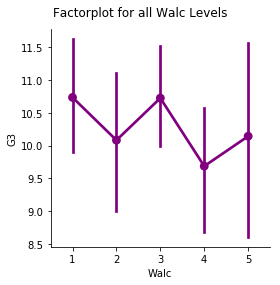

In [30]:
#95% G3 score Confidence Intervals For each level of drinking
plot=sns.factorplot(data=math_class,x="Walc",y="G3",color="purple")
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Factorplot for all Walc Levels')

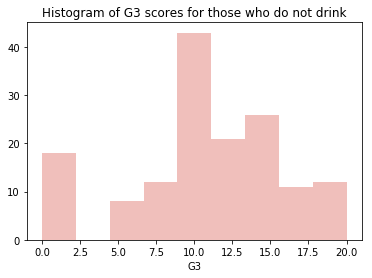

In [31]:
#Histogram for Light Drinkers, not exactly normal
sns.distplot(not_drinkers["G3"],kde=False).set_title("Histogram of G3 scores for those who do not drink")

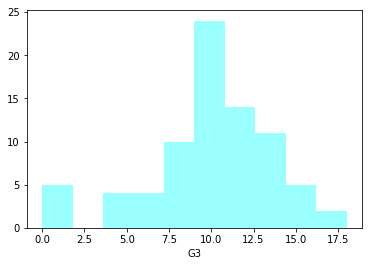

In [32]:
#Histogram for Heavy Drinkers
sns.distplot(heavy_drinkers["G3"],kde=False,color="cyan")

In [33]:
#Data is not exactly normal So I used the Mann Whitney U Test
stats.mannwhitneyu(not_drinkers.G3.dropna(),heavy_drinkers.G3.dropna())

MannwhitneyuResult(statistic=4933.5, pvalue=0.015437892983525483)

In [34]:
# Calculating the average score for both groups
print("The average scores for non-drinkers is {}".format(np.mean(not_drinkers.G3)))
print("The average scores for heavy-drinkers is {}".format(np.mean(heavy_drinkers.G3)))

The average scores for non-drinkers is 10.735099337748345
The average scores for heavy-drinkers is 9.848101265822784


## Null Hypothesis: There is no difference in median Math G3 score for students who are heavy drinkers compared to those who are not.
## P-value is less than .05, so there seems to be enough evidence to reject null hypothesis

# Performing Dimensionality Reduction on math_class data using Factor Analysis
### This will be Relevant For my clustering section 

### Before using Factor Analysis, I normalized my math class data using the preprocessing module from scikitlearn.
### I created two factors because I wanted to use the factors to visualize the K Means clustering later in this notebook.
### I was aiming to create two factors that were determined by students.

In [35]:
#Normalizing the dataset
math_class_norm = math_class.copy()
for colum in list(math_class_norm):
    if colum not in list(math_class_norm.describe()):
        math_class_norm=math_class_norm.drop(columns={colum})
print(len(list(math_class_norm)))
math_class_norm.ix[:,:16] = skp.scale(math_class_norm.astype(np.float))


16


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [36]:
#Performing Factor analysis
# Create a two-factor model

fa_model = skd.FactorAnalysis(n_components=2).fit(math_class_norm.transpose())

# # Show the loadings
df_loadings = pd.DataFrame(fa_model.components_[:2,:].T, 
                   index=math_class_norm.index,
                   columns=['Factor1', 'Factor2'])
df_loadings

,Factor1,Factor2
0,-0.308567,0.360803
1,-0.369652,-0.348002
2,-0.493007,-0.292253
3,0.725756,0.055269
4,0.028389,0.211068
5,0.562677,0.101709
6,0.193828,-0.121504
7,-0.177031,0.416258
8,0.941118,-0.128015
9,0.692876,0.131064


# Question 5: Clustering- Can math students be grouped in different clusters based on numeric variables?

### Conclusion: For this part, I found that both clustering methods gave me similar results: students from the math class can be clustered into two groups where one group is significantly larger than the other. I would say that these students are not easily clustered into distinct groups, especially with the factor analysis I calculated.

## Hierarchical Clustering
### I decided to use both forms of clustering we learned in class to see if results would be consistent. I first created a dataframe of only numerical valuables from the dataframe. I then created a square form distance matrix using Euclidean as my metric (got similar results with cosine) and used single linkage method (got similar results for other linkage methods). Finally, I graphed a dendrogram that showed that there were two clusters created with one being significantly larger than the other.

In [37]:
#creating a dataframe with numeric data
important_variables=math_class[["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences","G1","G2","G3"]]

In [38]:
#Creating a square form distance matrix
dist_xy = spd.squareform(spd.pdist(important_variables,metric='euclidean'))
dist_xy.shape

(395, 395)

In [39]:
#Using Single Linkage Method
Z_xy = sph.linkage(dist_xy,method='single')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


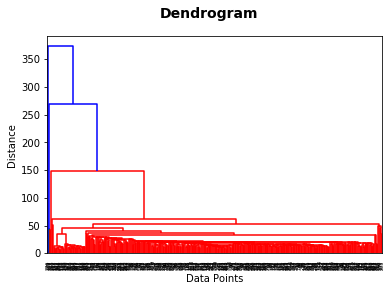

In [40]:
#Creating a dendrogram
sph.dendrogram(Z_xy)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.suptitle('Dendrogram', 
             fontweight='bold', fontsize=14);
plt.figure(figsize=(30,10))
#Seems to create two clusters, one is very small

In [41]:

cluster_labels = sph.fcluster(Z_xy,160,criterion='distance')
#Adding Cluster Labels to dataframe
important_variables['cluster_label'] = cluster_labels


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [42]:
important_variables['cluster_label'].value_counts()

2    392
1      2
3      1
Name: cluster_label, dtype: int64

## K-means Clustering to see if I come up with a different result
### To find the number of clusters I would need, I used the silhouette plot file you gave us in class and found that two clusters gave me the highest silhouette score. I was slightly disappointed because one cluster was way larger than the other. Supplementary, the two factors I created using Factor Analysis did not do a great job of visualizing the clusters. There is a lot of overlap in the graph.

In [43]:
important_variablesKmeans=important_variables.iloc[:,:-1]
#Getting all columns except for the last one

In [44]:
#Openning the plotSilhouette File
exec(open('plotSilhouette.py').read())

For n_clusters = 2 The average silhouette_score is : 0.4259232175008318


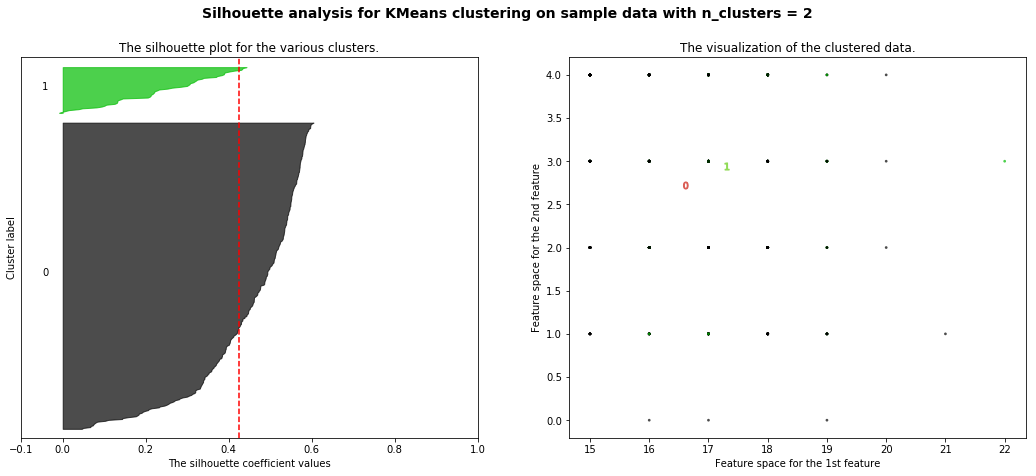

In [45]:
#2 clusters has the highest silhouette score
plotSilhouette(important_variablesKmeans, [2])

For n_clusters = 3 The average silhouette_score is : 0.29125088860116566


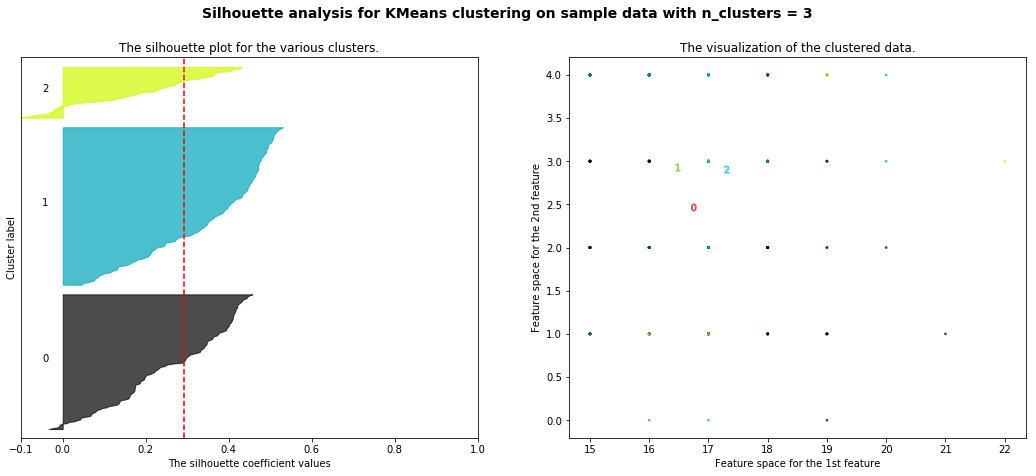

In [46]:
#Not as high
plotSilhouette(important_variablesKmeans, [3])

For n_clusters = 4 The average silhouette_score is : 0.3106392393811293


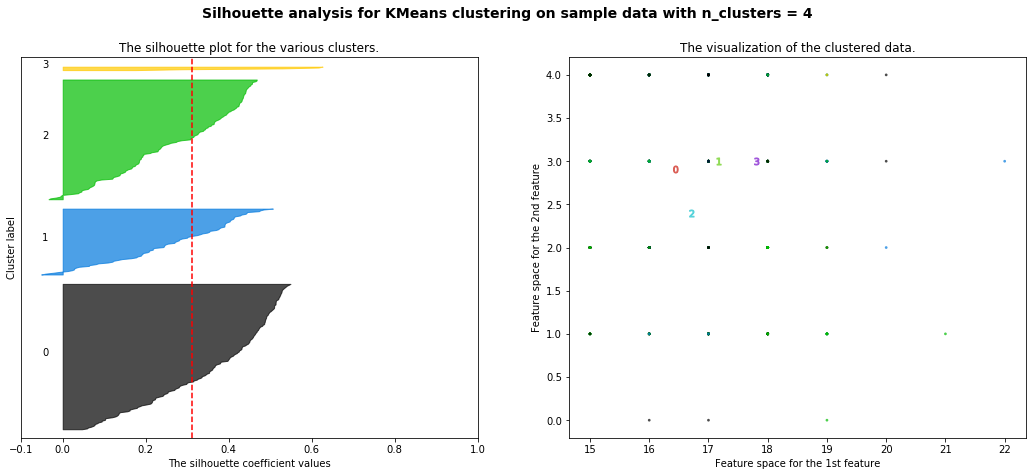

In [47]:
#Even Lower
plotSilhouette(important_variablesKmeans, [4])

In [48]:
#Performing K Means Clustering for two clusters
kmeans_model = skc.KMeans(n_clusters=2)
kmeans_model.fit(important_variables)
kmeans_model.labels_ #The labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [49]:
#Adding a column for the kmeans model
important_variables['cluster_labels_kmeans'] = kmeans_model.labels_

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
#Adding in the factors I did earlier in then notebook
important_variables['Factor1'] = df_loadings.iloc[:,0]
important_variables['Factor2'] = df_loadings.iloc[:,1]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
important_variables['cluster_labels_kmeans'].value_counts()

1    331
0     64
Name: cluster_labels_kmeans, dtype: int64

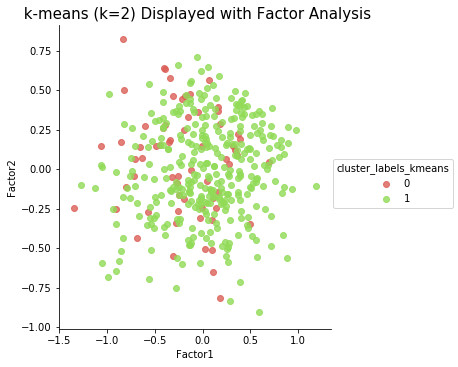

In [52]:
#Visualzing the points along the two Factors I created. Clearly these Factors are not great for visualizing the clusters.
f = sns.lmplot(x='Factor1', y='Factor2', data=important_variables, 
               hue='cluster_labels_kmeans',
               fit_reg=False)
plt.title(' k-means (k=2) Displayed with Factor Analysis', 
          fontsize=15);

# Question 6: Can I predict if a student in the Portuguese Class has family support using a classification algorithm?

### Conclusion: For this part, I used both the Random Forests and Naive Bayes algorithms to make predictions. I found below average success for both when comparing my accuracy scores to the baseline.  However, the Naive Bayes was slightly better. Nonetheless, I would say the answer to this question is no, neither were great at predicting family education support.
### Before plugging any data into these classifiers, I Z-Scored the data. I wanted to make sure that all data units looked the same. To decide what variables I would use for both models, I grouped the students into two groups: one where students have family support, and one where they do not. I then averaged all variables for both groups and subtracted the means between the two groups. Whichever variables had absolute differences above .1 are the ones I included in my model. The variables that I ended up including were G3, Walc, studytime, Fedu, age, and Medu.
### I split the dataframe into a training and testing set. 70% of the original data is in the training set.
### I ran a for loop that indicated to me the depth and number of estimators that would give me the best accuracy score for the Random Forests model.
### I fit both models, and evaluated them using a 10-fold cross validation. I also plotted a confusion matrix for both of them. I found results that were slightly better than the baseline for Naive Bayes.

In [53]:
#The amount of students with family support in Portuguese Class
#baseline
port_class.famsup.value_counts()

yes    398
no     251
Name: famsup, dtype: int64

In [54]:
#Calculating the baseline
print("Percentage of students with family support is {}%".format(398/650*100))

Percentage of students with family support is 61.23076923076923%


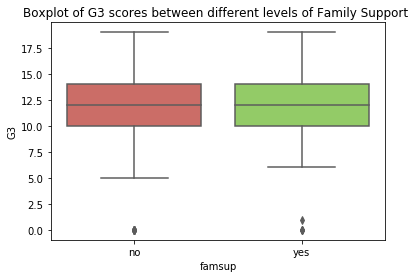

In [55]:
#Using a boxplot to visualize the G3 distributions for different family support answers
sns.boxplot(x="famsup",y="G3",data=port_class).set_title("Boxplot of G3 scores between different levels of Family Support ")

In [56]:
#Function that Z-Score Normalizes the data
def z_score(x):
    for b in x.describe().columns:
        
        mean=np.mean(x[b])
        
        std=np.std(x[b])
        x[b]=(x[b]-mean)/std
    return(x)  

In [57]:

port_classZ=z_score(port_class)

In [58]:
# Using groupby to separate the mean of variables for different family support measures
famsup_means=port_classZ.groupby("famsup").mean()
famsup_means.apply(func=lambda x: abs(x.loc["no"]-x.loc["yes"]),axis=0)


age           0.209226
Medu          0.247413
Fedu          0.277596
traveltime    0.080675
studytime     0.294677
failures      0.014337
famrel        0.031268
freetime      0.007730
goout         0.035445
Dalc          0.034587
Walc          0.134711
health        0.038610
absences      0.086201
G1            0.078552
G2            0.078317
G3            0.121571
dtype: float64

In [59]:
#Creating a dataframe of variables with noticeable difference between students from both 
variables=port_classZ[["famsup","G3","Walc","studytime","Fedu","age","Medu"]]

In [60]:
#Creating a training, test dataframe
msk = np.random.rand(len(variables)) < 0.7
df_port_train = variables[msk]
df_port_test = variables[~msk]

## Random Forest Model

In [61]:
#Random Forest Model
#Seeing what the optimal number of estimators and max_depth of my tree is
n=5
b=5
best = [0,0,0]
for n_est in range(5,100,5):
    for depth in range(2,20,2):
        clf = skens.RandomForestClassifier(n_estimators=n_est, max_depth=depth)
        clf.fit(df_port_train.iloc[:,1:], df_port_train.famsup)

        test_predicted= clf.predict(df_port_test.iloc[:,1:])
        ac = skmetric.accuracy_score(df_port_test.famsup, test_predicted)
        if ac > best[2]:
            best[0] = n_est
            best[1] = depth
            best[2] = ac
print (best)

[35, 14, 0.6555555555555556]


In [62]:
#Fitting the model
rf_model = skens.RandomForestClassifier(n_estimators=best[0], max_depth=best[1])
rf_model.fit(df_port_train.iloc[:,1:],df_port_train.famsup)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
# Predicting Labels
predicted_labels = rf_model.predict(df_port_test.iloc[:,1:])

In [64]:
#Calculating an accuracy Score
skmetric.accuracy_score(y_true=df_port_test["famsup"],y_pred=predicted_labels)

0.6222222222222222

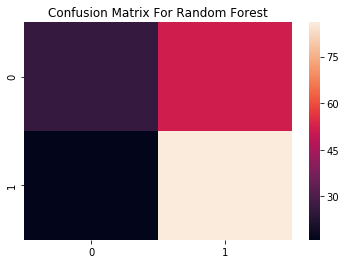

In [65]:
# Creating a Confusing Matrix for Random Forest
random_forest=confusion_matrix(df_port_test["famsup"], predicted_labels)
sns.heatmap(random_forest).set_title("Confusion Matrix For Random Forest")

In [66]:
#List of Cross Validation Metrics
measurements=["accuracy","f1_micro","f1_macro","precision_macro","precision_micro","recall_macro","recall_micro"]

In [67]:
#Performing Cross Validation using all Cross Validation Metrics
for measure in measurements:
    scores = cross_val_score(rf_model, variables.iloc[:,1:], variables.famsup, cv=10, scoring=measure)
    print(scores.mean())

0.5517314976689977
0.5639925699300699
0.5300578028786465
0.5077335684526519
0.5748812645687645
0.5420448717948718
0.571708916083916


### Cross Validation Results here were not good. Some of the results were below the baseline for several measures.

## Naive Bayes Model

In [68]:
#Fitting the model
gnb_model = sknb.GaussianNB()
gnb_model.fit(df_port_train.iloc[:,1:],df_port_train.famsup)

GaussianNB(priors=None)

In [69]:
#Using it predict labels
y_pred = gnb_model.predict(df_port_test.iloc[:,1:])
df_port_test['predicted_nb_AllFeats'] = y_pred

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
#Testing the Accuracy
skmetric.accuracy_score(y_true=df_port_test["famsup"],
                       y_pred=df_port_test["predicted_nb_AllFeats"])

0.6

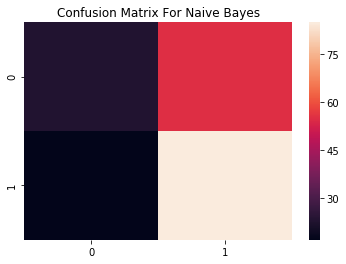

In [71]:
# Creating a Confusing Matrix for Random Forest
naive_bayes=confusion_matrix(df_port_test["famsup"], df_port_test["predicted_nb_AllFeats"])
sns.heatmap(naive_bayes).set_title("Confusion Matrix For Naive Bayes")

In [72]:
#Performing Cross Validation using all metrics
for measure in measurements:
    scores = cross_val_score(gnb_model, variables.iloc[:,1:], variables.famsup, cv=10, scoring=measure)
    print(scores.mean())

0.613201486013986
0.613201486013986
0.5369642261765762
0.5713886327068336
0.613201486013986
0.5590384615384616
0.613201486013986


### The Cross Validation Scores were slightly better for the Bayes model. However, I would still not say it gave me great results.

# Future Work


I feel as though there is a lot of future work that could be done to improve my findings. I
would love to see a dataset with the same variables as this one but for a different age group or 
different class subject. Comparing the results I had with this project with similar work for
different age groups or class subject could produce fascinating results.
In terms of improving my results for this project, there are several things I could do.
Since my residuals for question 3 were not normally distributed I could look into using nonlinear
regression methods for the same task in the future. For questions 5 and 6, I could try
different clustering/classification methods to try to get better results.